In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente3/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

28683

In [6]:
with open('dataset/generado/paciente3/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

28683

In [8]:
with open('dataset/generado/paciente3/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

3585

In [10]:
with open('dataset/generado/paciente3/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

3585

In [12]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

3586

In [14]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

3586

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/vanilla_dropout.h5')

Epoch 1/50
897/897 [==============================] - 32s 24ms/step - loss: 0.0195 - mae: 0.1041 - mse: 0.0195 - val_loss: 0.0080 - val_mae: 0.0706 - val_mse: 0.0080
Epoch 2/50
897/897 [==============================] - 21s 24ms/step - loss: 0.0100 - mae: 0.0766 - mse: 0.0100 - val_loss: 0.0049 - val_mae: 0.0541 - val_mse: 0.0049
Epoch 3/50
897/897 [==============================] - 20s 23ms/step - loss: 0.0074 - mae: 0.0656 - mse: 0.0074 - val_loss: 0.0046 - val_mae: 0.0532 - val_mse: 0.0046
Epoch 4/50
897/897 [==============================] - 22s 25ms/step - loss: 0.0061 - mae: 0.0594 - mse: 0.0061 - val_loss: 0.0040 - val_mae: 0.0501 - val_mse: 0.0040
Epoch 5/50
897/897 [==============================] - 35s 39ms/step - loss: 0.0054 - mae: 0.0555 - mse: 0.0054 - val_loss: 0.0041 - val_mae: 0.0508 - val_mse: 0.0041
Epoch 6/50
897/897 [==============================] - 30s 33ms/step - loss: 0.0050 - mae: 0.0535 - mse: 0.0050 - val_loss: 0.0033 - val_mae: 0.0459 - val_mse: 0.0033
Epoc

113/113 [==============================] - 1s 11ms/step - loss: 0.0033 - mae: 0.0439 - mse: 0.0033
test loss, test acc: [0.00329789356328547, 0.04389553517103195, 0.00329789356328547]


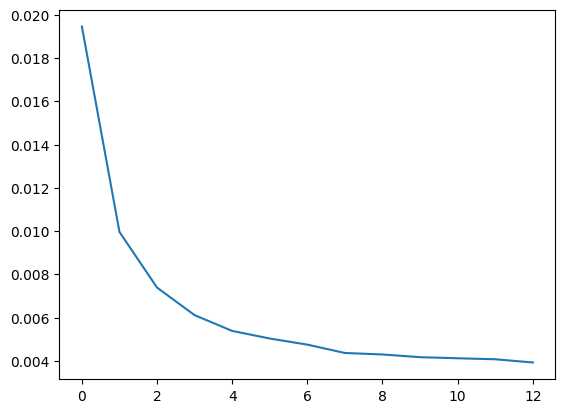

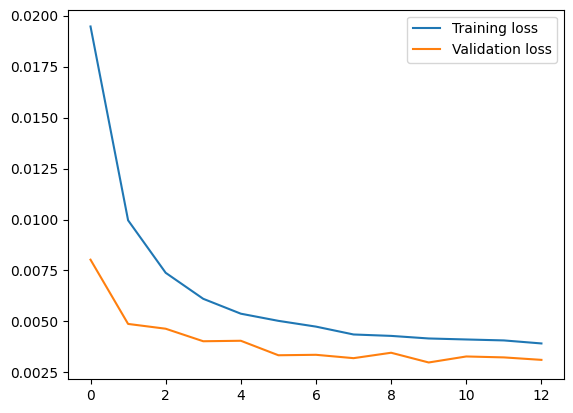

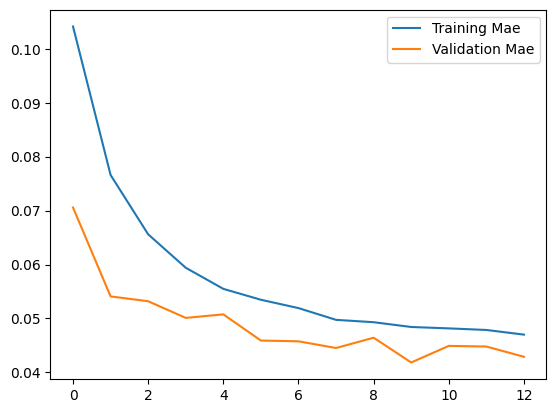

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 9ms/step


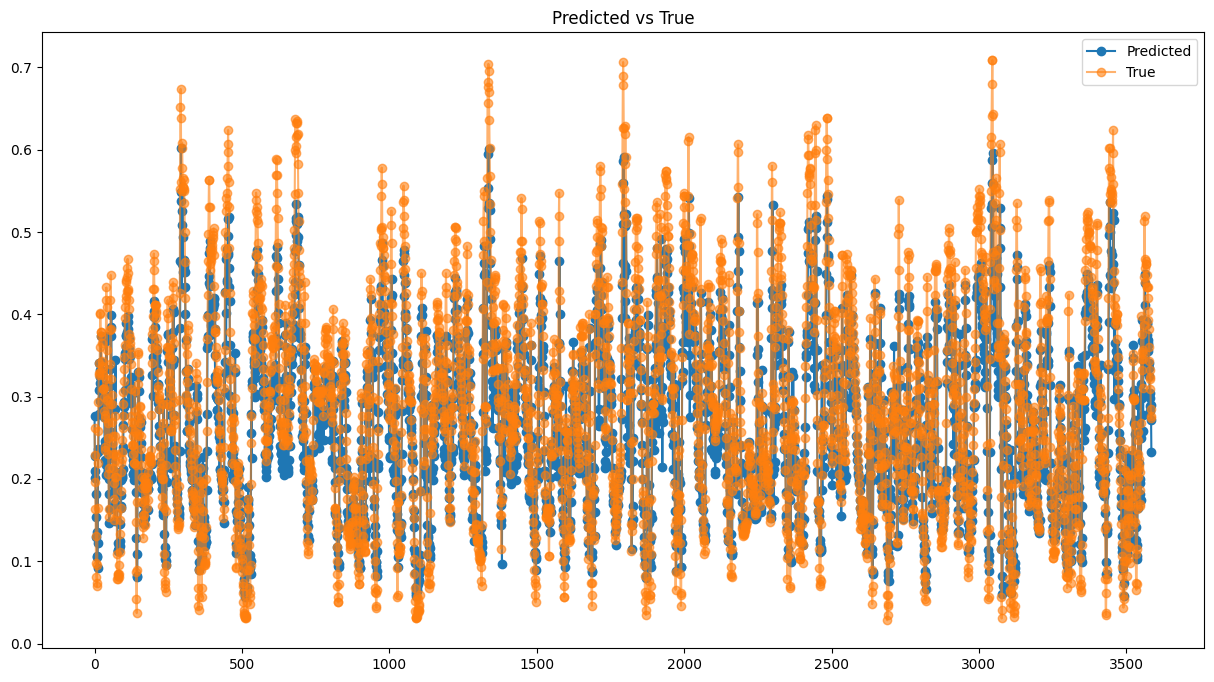

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04389553428547976,
 'mse': 0.057427285408514474,
 'rmse': 0.0032978931093909794}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/vanilla_NO_dropout.h5')

Epoch 1/50
897/897 [==============================] - 27s 25ms/step - loss: 0.0126 - mae: 0.0795 - mse: 0.0126 - val_loss: 0.0039 - val_mae: 0.0481 - val_mse: 0.0039
Epoch 2/50
897/897 [==============================] - 21s 24ms/step - loss: 0.0051 - mae: 0.0529 - mse: 0.0051 - val_loss: 0.0027 - val_mae: 0.0363 - val_mse: 0.0027
Epoch 3/50
897/897 [==============================] - 22s 24ms/step - loss: 0.0040 - mae: 0.0466 - mse: 0.0040 - val_loss: 0.0022 - val_mae: 0.0328 - val_mse: 0.0022
Epoch 4/50
897/897 [==============================] - 21s 24ms/step - loss: 0.0035 - mae: 0.0430 - mse: 0.0035 - val_loss: 0.0020 - val_mae: 0.0311 - val_mse: 0.0020
Epoch 5/50
897/897 [==============================] - 21s 23ms/step - loss: 0.0031 - mae: 0.0407 - mse: 0.0031 - val_loss: 0.0019 - val_mae: 0.0299 - val_mse: 0.0019
Epoch 6/50
897/897 [==============================] - 20s 22ms/step - loss: 0.0029 - mae: 0.0394 - mse: 0.0029 - val_loss: 0.0018 - val_mae: 0.0289 - val_mse: 0.0018
Epoc

113/113 [==============================] - 1s 10ms/step - loss: 0.0020 - mae: 0.0311 - mse: 0.0020
test loss, test acc: [0.0020189385395497084, 0.031059663742780685, 0.0020189385395497084]


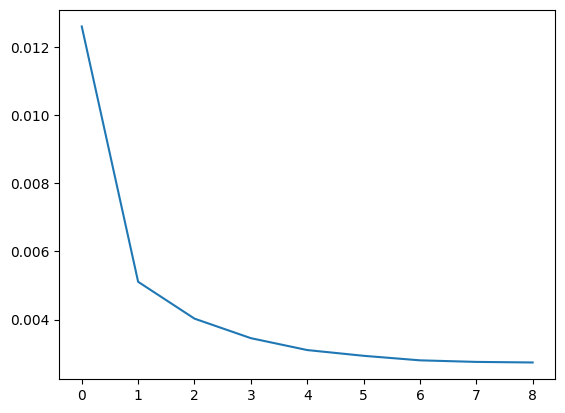

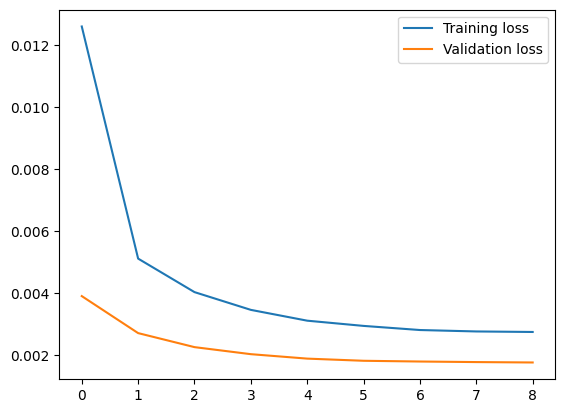

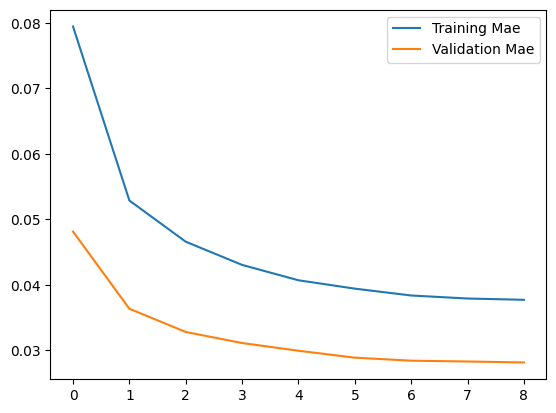

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 10ms/step


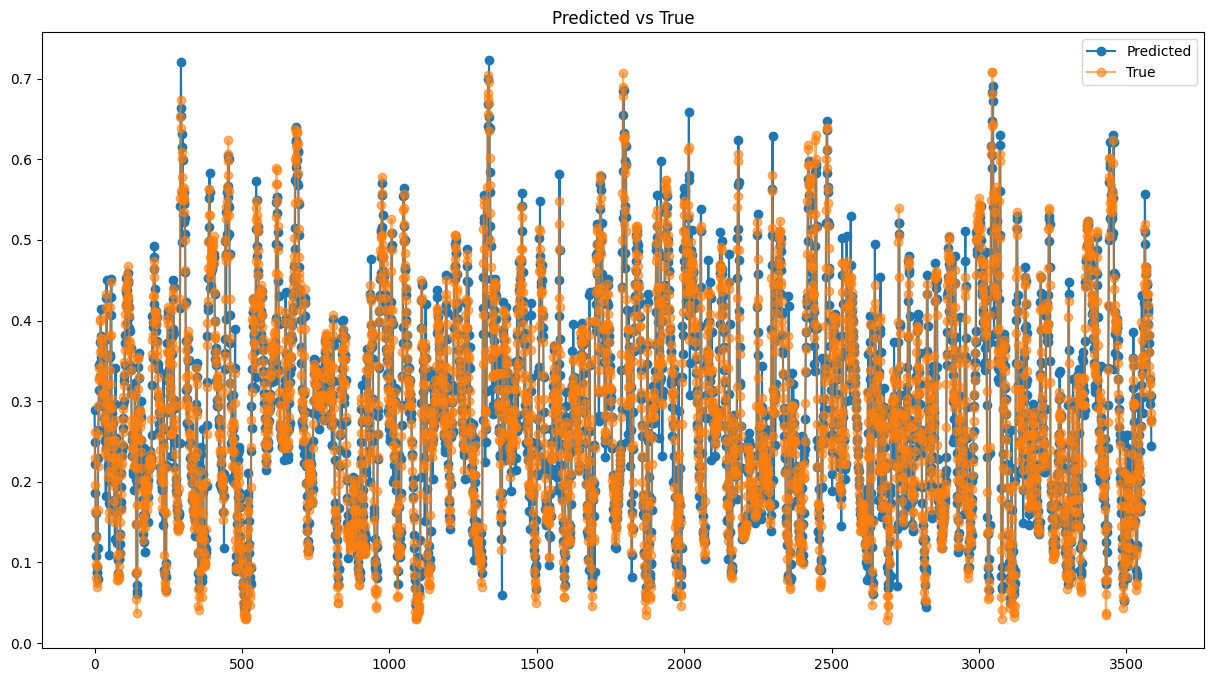

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.03105966515951688,
 'mse': 0.04493260187363216,
 'rmse': 0.0020189387111343325}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/stacked_dropout.h5')

Epoch 1/50
897/897 [==============================] - 55s 51ms/step - loss: 0.0205 - mae: 0.1086 - mse: 0.0205 - val_loss: 0.0060 - val_mae: 0.0592 - val_mse: 0.0060
Epoch 2/50
897/897 [==============================] - 42s 47ms/step - loss: 0.0102 - mae: 0.0776 - mse: 0.0102 - val_loss: 0.0043 - val_mae: 0.0510 - val_mse: 0.0043
Epoch 3/50
897/897 [==============================] - 40s 44ms/step - loss: 0.0072 - mae: 0.0647 - mse: 0.0072 - val_loss: 0.0033 - val_mae: 0.0453 - val_mse: 0.0033
Epoch 4/50
897/897 [==============================] - 43s 48ms/step - loss: 0.0057 - mae: 0.0568 - mse: 0.0057 - val_loss: 0.0031 - val_mae: 0.0445 - val_mse: 0.0031
Epoch 5/50
897/897 [==============================] - 44s 50ms/step - loss: 0.0049 - mae: 0.0528 - mse: 0.0049 - val_loss: 0.0028 - val_mae: 0.0419 - val_mse: 0.0028
Epoch 6/50
897/897 [==============================] - 42s 47ms/step - loss: 0.0045 - mae: 0.0506 - mse: 0.0045 - val_loss: 0.0028 - val_mae: 0.0423 - val_mse: 0.0028
Epoc

113/113 [==============================] - 2s 18ms/step - loss: 0.0027 - mae: 0.0410 - mse: 0.0027
test loss, test acc: [0.0027039390988647938, 0.04104259982705116, 0.0027039390988647938]


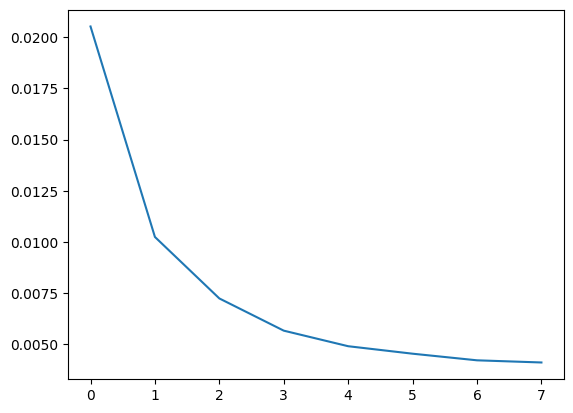

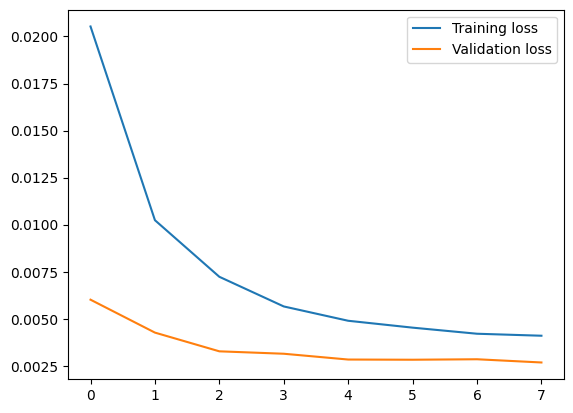

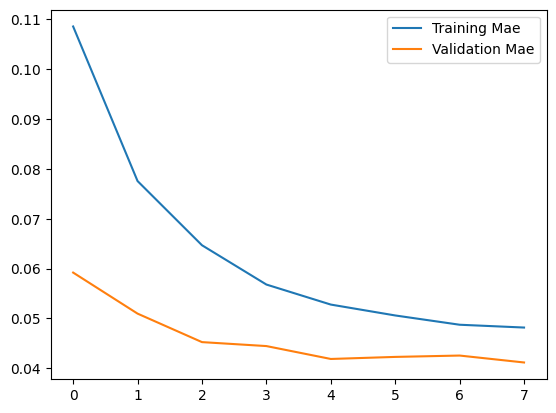

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 3s 14ms/step


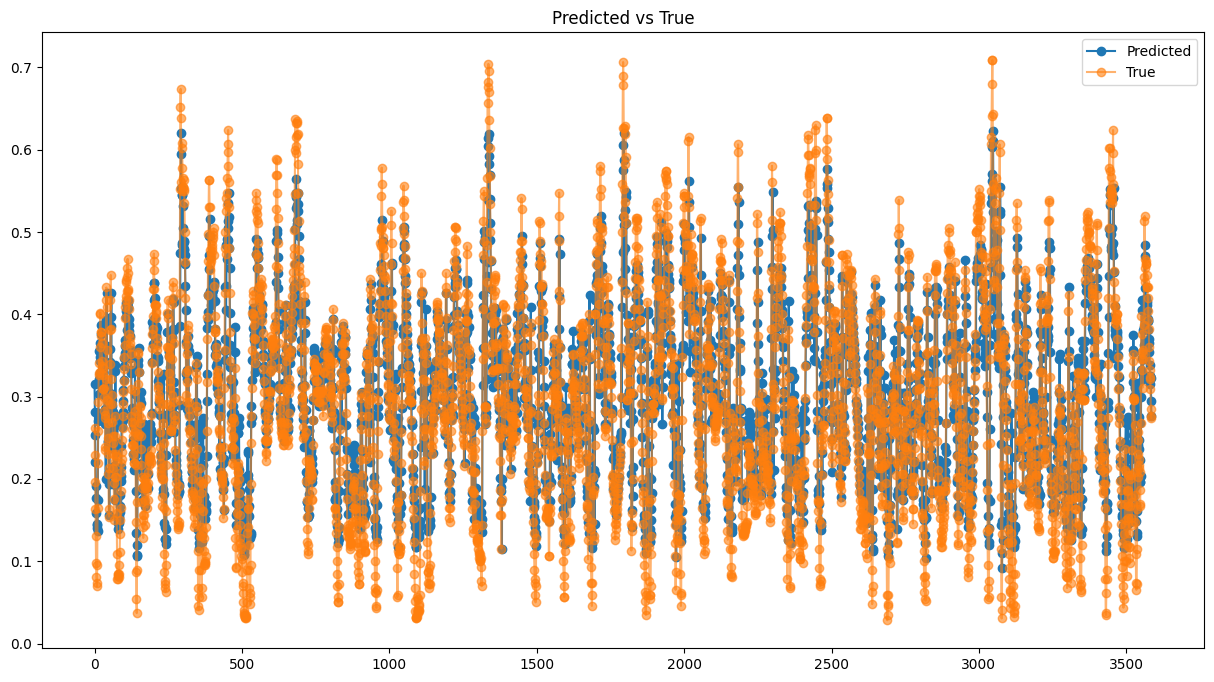

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04104259553712046,
 'mse': 0.05199941279607,
 'rmse': 0.0027039389311360887}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/stacked_NO_dropout.h5')

Epoch 1/50
897/897 [==============================] - 63s 50ms/step - loss: 0.0143 - mae: 0.0881 - mse: 0.0143 - val_loss: 0.0043 - val_mae: 0.0495 - val_mse: 0.0043
Epoch 2/50
897/897 [==============================] - 42s 47ms/step - loss: 0.0052 - mae: 0.0534 - mse: 0.0052 - val_loss: 0.0025 - val_mae: 0.0357 - val_mse: 0.0025
Epoch 3/50
897/897 [==============================] - 41s 46ms/step - loss: 0.0035 - mae: 0.0438 - mse: 0.0035 - val_loss: 0.0020 - val_mae: 0.0314 - val_mse: 0.0020
Epoch 4/50
897/897 [==============================] - 39s 44ms/step - loss: 0.0029 - mae: 0.0396 - mse: 0.0029 - val_loss: 0.0018 - val_mae: 0.0290 - val_mse: 0.0018
Epoch 5/50
897/897 [==============================] - 34s 38ms/step - loss: 0.0028 - mae: 0.0380 - mse: 0.0028 - val_loss: 0.0017 - val_mae: 0.0285 - val_mse: 0.0017
Epoch 6/50
897/897 [==============================] - 36s 40ms/step - loss: 0.0027 - mae: 0.0374 - mse: 0.0027 - val_loss: 0.0017 - val_mae: 0.0279 - val_mse: 0.0017
Epoc

113/113 [==============================] - 2s 19ms/step - loss: 0.0020 - mae: 0.0313 - mse: 0.0020
test loss, test acc: [0.001956904074177146, 0.03129609674215317, 0.001956904074177146]


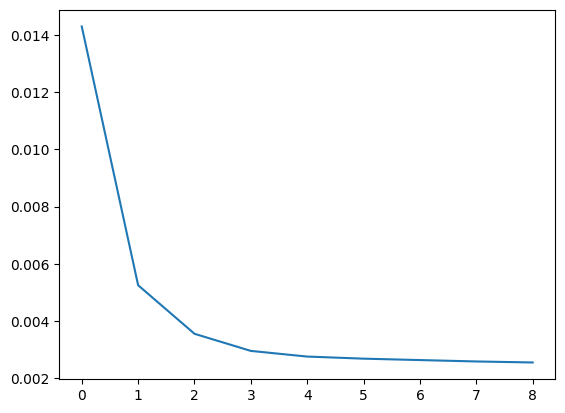

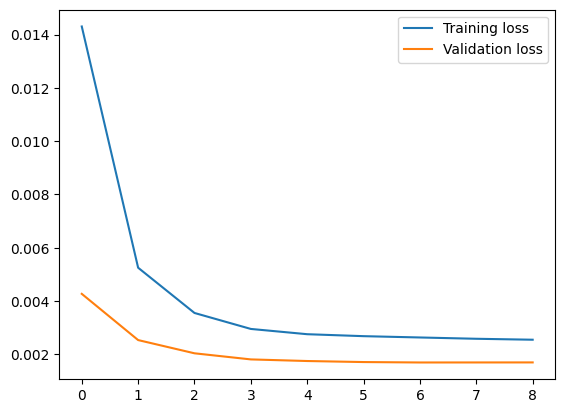

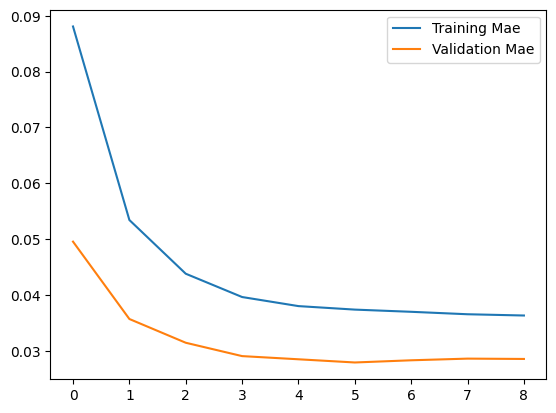

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 3s 18ms/step


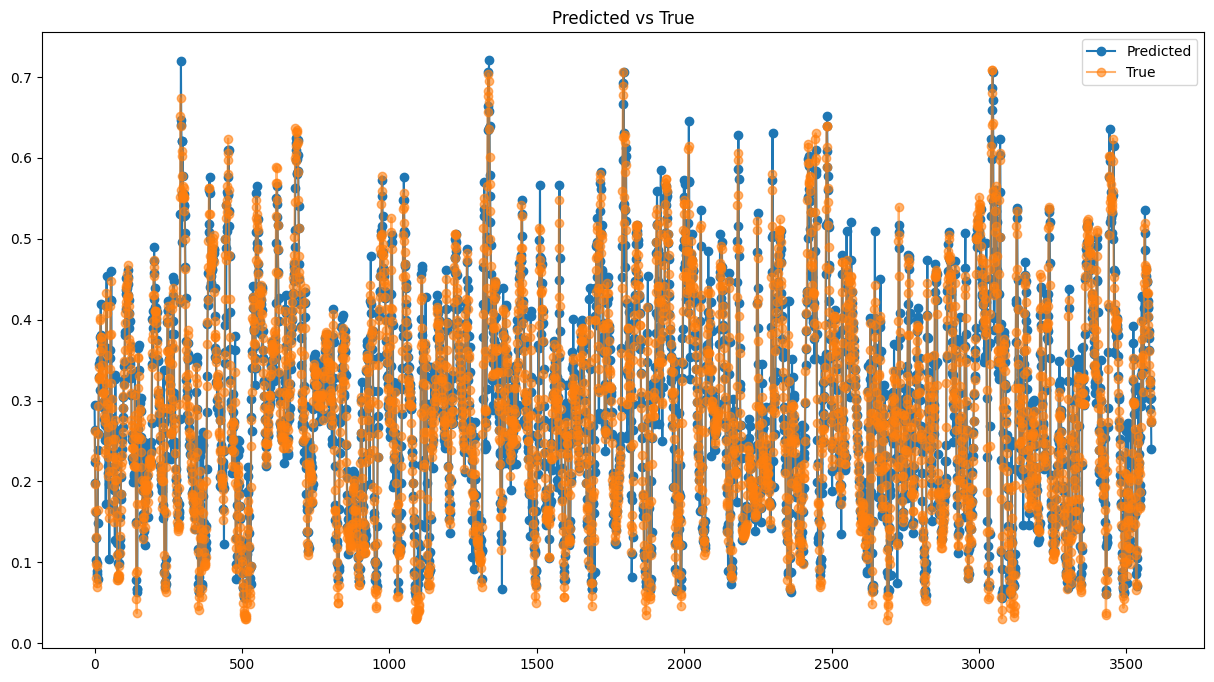

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.031296093101864694,
 'mse': 0.04423690665336412,
 'rmse': 0.0019569039102584505}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/bidirectional_dropout.h5')

Epoch 1/50
897/897 [==============================] - 38s 31ms/step - loss: 0.0193 - mae: 0.1040 - mse: 0.0193 - val_loss: 0.0053 - val_mae: 0.0546 - val_mse: 0.0053
Epoch 2/50
897/897 [==============================] - 30s 33ms/step - loss: 0.0094 - mae: 0.0743 - mse: 0.0094 - val_loss: 0.0045 - val_mae: 0.0515 - val_mse: 0.0045
Epoch 3/50
897/897 [==============================] - 27s 30ms/step - loss: 0.0072 - mae: 0.0646 - mse: 0.0072 - val_loss: 0.0036 - val_mae: 0.0462 - val_mse: 0.0036
Epoch 4/50
897/897 [==============================] - 25s 28ms/step - loss: 0.0060 - mae: 0.0585 - mse: 0.0060 - val_loss: 0.0032 - val_mae: 0.0441 - val_mse: 0.0032
Epoch 5/50
897/897 [==============================] - 29s 32ms/step - loss: 0.0052 - mae: 0.0545 - mse: 0.0052 - val_loss: 0.0031 - val_mae: 0.0427 - val_mse: 0.0031
Epoch 6/50
897/897 [==============================] - 25s 28ms/step - loss: 0.0048 - mae: 0.0520 - mse: 0.0048 - val_loss: 0.0032 - val_mae: 0.0452 - val_mse: 0.0032
Epoc

113/113 [==============================] - 1s 10ms/step - loss: 0.0031 - mae: 0.0422 - mse: 0.0031
test loss, test acc: [0.0030724697280675173, 0.04219262674450874, 0.0030724697280675173]


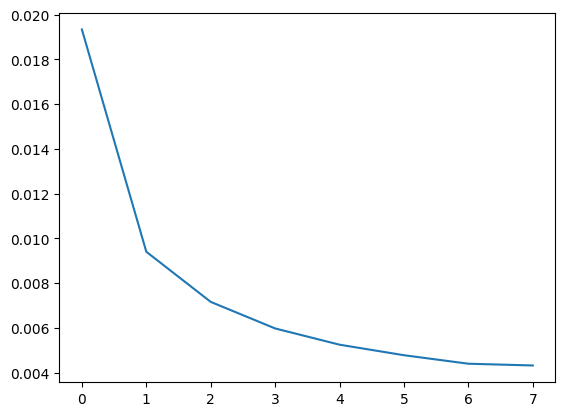

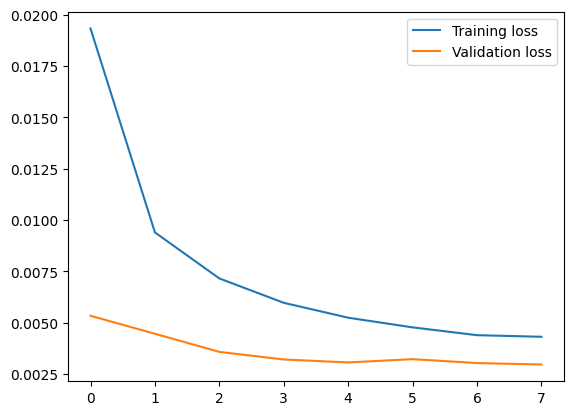

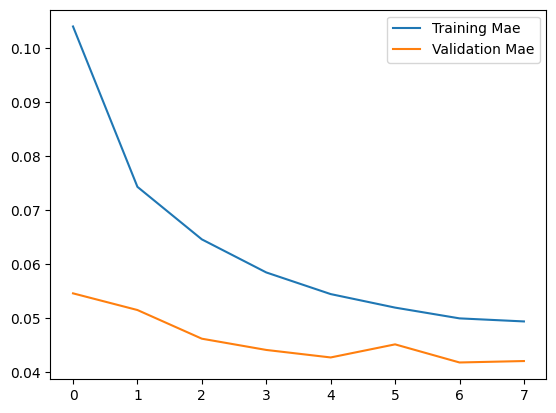

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 10ms/step


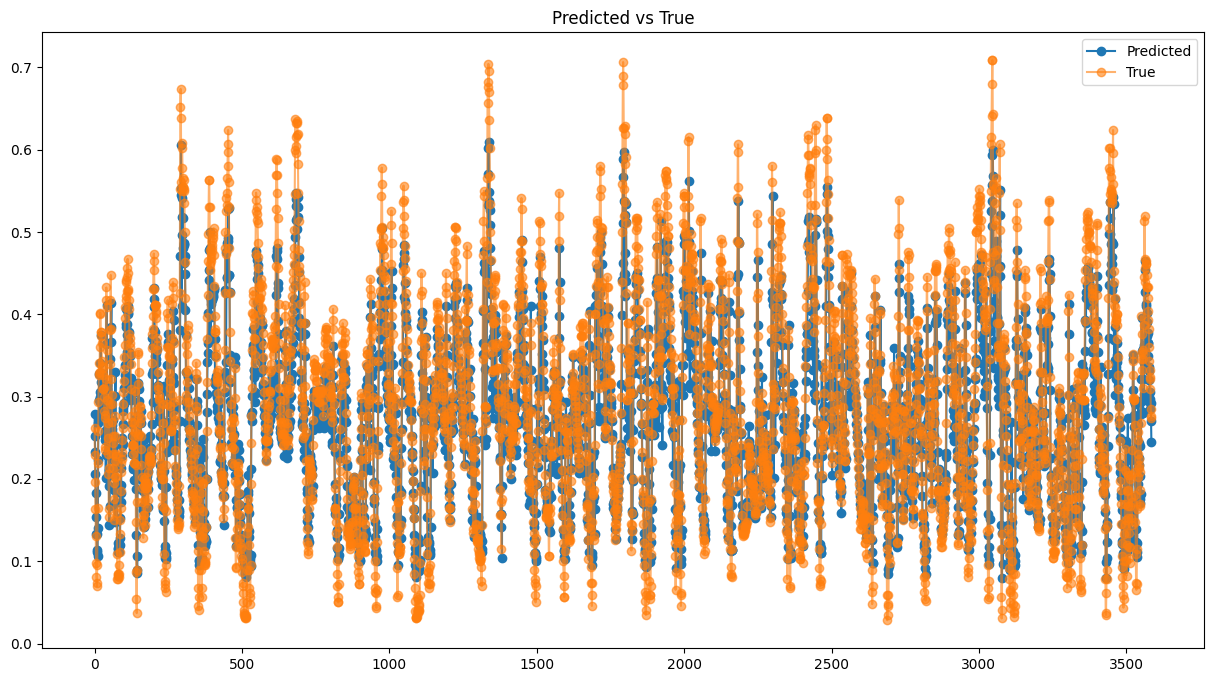

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.042192632037454283,
 'mse': 0.055429860761645675,
 'rmse': 0.003072469464055427}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente3/bidirectional_NO_dropout.h5')

Epoch 1/50
897/897 [==============================] - 34s 28ms/step - loss: 0.0121 - mae: 0.0818 - mse: 0.0121 - val_loss: 0.0050 - val_mae: 0.0560 - val_mse: 0.0050
Epoch 2/50
897/897 [==============================] - 24s 27ms/step - loss: 0.0062 - mae: 0.0589 - mse: 0.0062 - val_loss: 0.0030 - val_mae: 0.0401 - val_mse: 0.0030
Epoch 3/50
897/897 [==============================] - 25s 28ms/step - loss: 0.0046 - mae: 0.0500 - mse: 0.0046 - val_loss: 0.0024 - val_mae: 0.0342 - val_mse: 0.0024
Epoch 4/50
897/897 [==============================] - 27s 30ms/step - loss: 0.0038 - mae: 0.0453 - mse: 0.0038 - val_loss: 0.0021 - val_mae: 0.0317 - val_mse: 0.0021
Epoch 5/50
897/897 [==============================] - 26s 29ms/step - loss: 0.0033 - mae: 0.0421 - mse: 0.0033 - val_loss: 0.0019 - val_mae: 0.0305 - val_mse: 0.0019
Epoch 6/50
897/897 [==============================] - 25s 28ms/step - loss: 0.0030 - mae: 0.0398 - mse: 0.0030 - val_loss: 0.0018 - val_mae: 0.0295 - val_mse: 0.0018
Epoc

113/113 [==============================] - 1s 10ms/step - loss: 0.0020 - mae: 0.0320 - mse: 0.0020
test loss, test acc: [0.0020016850903630257, 0.032028522342443466, 0.0020016850903630257]


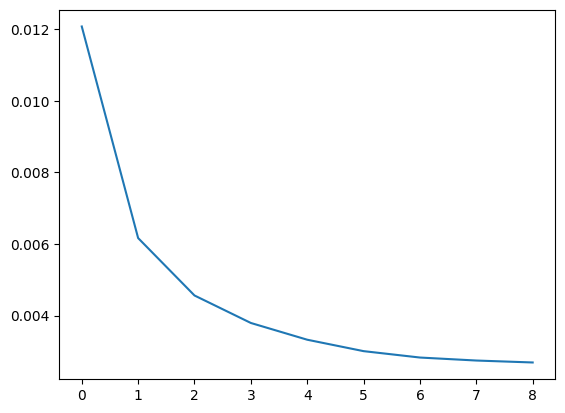

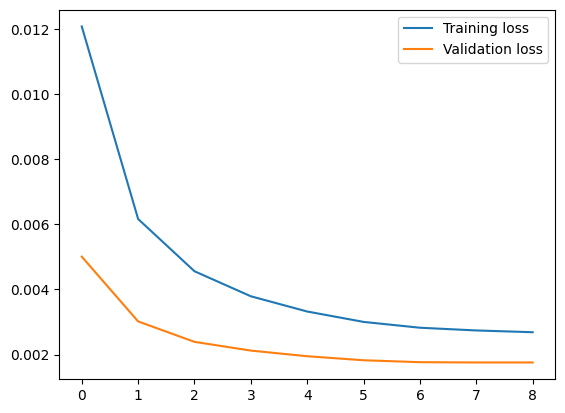

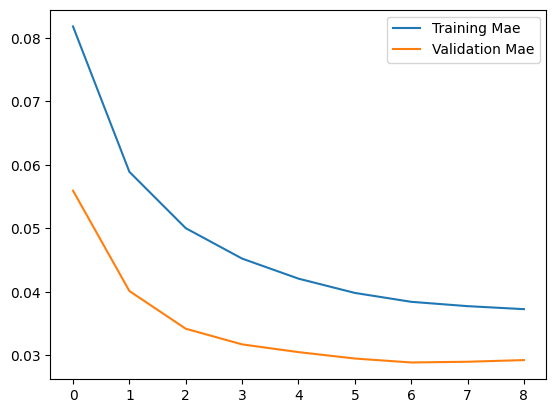

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

113/113 [==============================] - 2s 10ms/step


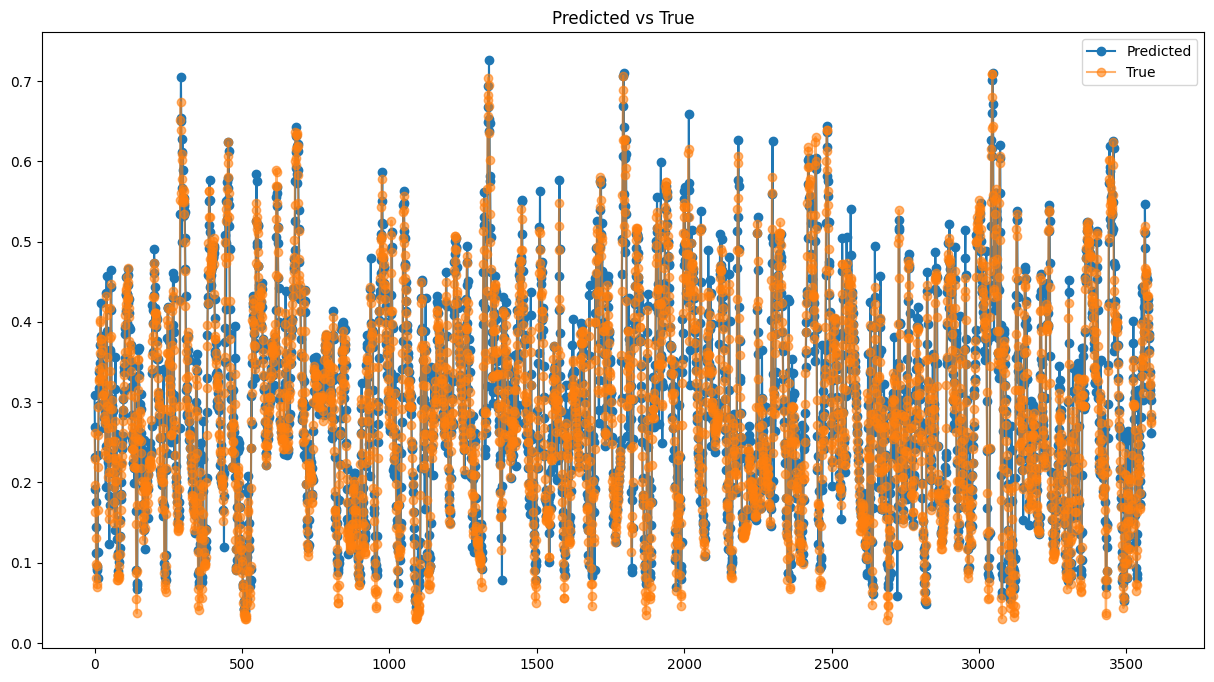

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.032028520718067485,
 'mse': 0.0447401946446019,
 'rmse': 0.002001685016836864}